# Voice Activity Detection Pipeline

This iPython notebook will allow us to visualize methods to distinguish speech from non speech sounds on an example file called Harry.

In [22]:
import matplotlib.pyplot as plt
from pylab import specgram
import scipy
import numpy as np
from scipy.io.wavfile import read, write
import scipy.signal
%matplotlib inline

## Accessing WAV data

In [38]:
# Reads a WAV file by the name of FILE 
def readwav(file):
    return scipy.io.wavfile.read(file)[1]

# Writes new WAV file using the numpy aray, DATA
def writewav(data, outfile, samplerate):
    scipy.io.wavfile.write(outfile, samplerate, data)

## Generating a Spectrogram

The spectrogram will allow us to see the presence of different frequencies over time.

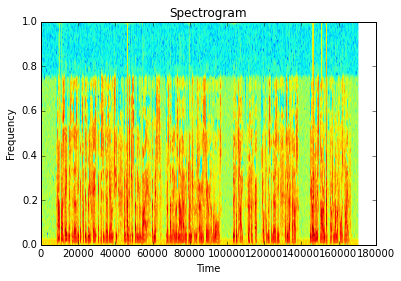

In [39]:
audio = readwav('harry.wav')

plt.clf()
plt.title('Spectrogram')
plt.ylabel('Frequency')
plt.xlabel('Time')
sgram = specgram(audio)
plt.show()

## Voiced vs Unvoiced

Combining zero crossings with short time energy calculations will allow us to distinguish voiced from unvoiced sounds.

In [40]:
import utils

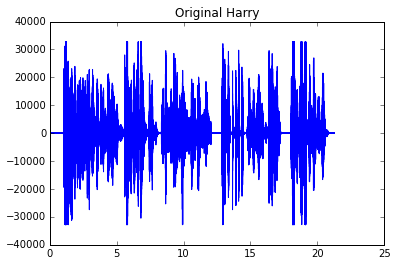

In [41]:
# Unpack the data
sample_rate, data = scipy.io.wavfile.read("harry.wav")
data = np.array(data, dtype=float)
t = np.arange(len(data)) * (1.0 / sample_rate)

plt.clf()
plt.title('Original Harry')
plt.plot(t, data)
plt.show()

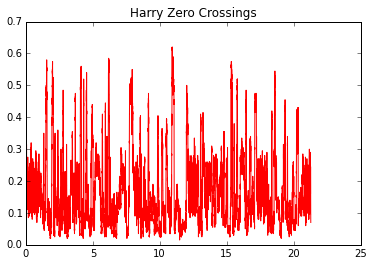

In [42]:
# Find the short time zero crossing rate.
zc = utils.stzcr(data, scipy.signal.get_window("boxcar", 200))

plt.clf()
plt.title('Harry Zero Crossings') # Plot is very small when superimposed
plt.plot(t, zc, 'r')
plt.show()

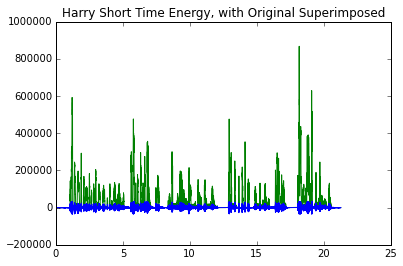

In [43]:
# Calculate short time energy
e = utils.ste(data, scipy.signal.get_window("hamming", 201))

plt.clf()
plt.title('Harry Short Time Energy, with Original Superimposed')
plt.plot(t, e, 'g')
plt.plot(t, data)
plt.show()

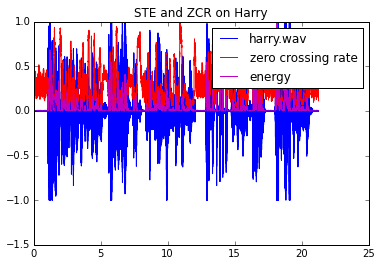

In [44]:
# All together

plt.clf()
plt.title("STE and ZCR on Harry")
plt.plot(t, data / data.max(), label="harry.wav")
plt.plot(t, zc / zc.max(), 'r', label="zero crossing rate")
plt.plot(t, e / e.max(), 'm', label="energy")
plt.legend()

## Intensity

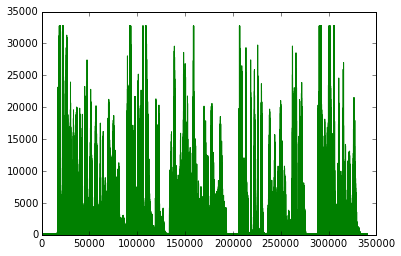

In [45]:
intensity = abs(data)
plt.plot(intensity, 'g')

## Formants

In [ ]:
# Your code here

## Pitch

In [ ]:
# Your code here